# Scratchpad

## PyTorch quick overview

Following along with: https://github.com/vahidk/EffectivePyTorch

### Setup

In [5]:
import numpy as np

import torch

### Basics

In [6]:
x = torch.randn([3, 5])
y = torch.randn([3, 5])
z = x +y

In [7]:
z.shape

torch.Size([3, 5])

In [2]:
x = torch.randn([3, 5])
y = torch.randn([5, 4])
z = x @ y

In [3]:
x.shape

torch.Size([3, 5])

In [4]:
z.shape

torch.Size([3, 4])

In [9]:
z

tensor([[ 1.6630, -1.5812,  0.6480, -0.3322, -2.1186],
        [-1.7094, -0.6856,  0.2842, -0.0681, -0.5432],
        [ 1.7740,  3.2653, -0.6112, -0.1560, -1.7339]])

In [8]:
print(z.numpy())

[[ 1.6630206  -1.5812199   0.6480304  -0.33221006 -2.1185994 ]
 [-1.7094072  -0.68564904  0.28417927 -0.0680545  -0.5431815 ]
 [ 1.7739999   3.265318   -0.61121875 -0.15603794 -1.7338973 ]]


In [18]:
x = torch.tensor(np.random.normal(0, 1, 5))

In [39]:
x = torch.tensor([1,2,3])
x

tensor([1, 2, 3])

In [43]:
foo = torch.stack([x*x, x, torch.ones_like(x)])
foo

tensor([[1, 4, 9],
        [1, 2, 3],
        [1, 1, 1]])

In [44]:
foo.shape

torch.Size([3, 3])

### Auto differentiation

In [21]:
def u(x):
    return x * x

def g(u):
    return -u

In [26]:
x = torch.tensor(2.0, requires_grad=True)
dgdx = torch.autograd.grad(g(u(x)), x)[0]

In [27]:
dgdx

tensor(-4.)

### Curve fitting

In [88]:
# Assuming we know that the desired function is a polynomial of 2nd degree, we
# allocate a vector of size 3 to hold the coefficients and initialize it with
# random noise.
w = torch.tensor(torch.randn([3, 1]).numpy(), requires_grad=True)

# We use the Adam optimizer with learning rate set to 0.1 to minimize the loss.
opt = torch.optim.Adam([w], lr=0.1)

def generate_data(sample_size=100):
    # Generate some training data based on the true function
    x = torch.rand(sample_size) * 20 - 10
    y = 5 * x * x + 3
    return x, y

def model(x):
    # stack: if x=1d tensor, default dim=0 stacks tensors row-wise
    # if dim=1, it stacks tensors column wise
    f = torch.stack([x * x, x, torch.ones_like(x)], dim=1)
    # the matrix mult. @ does a column by column multiplication and sum
    # resulting in a tensor of shape [sample_size, 1]
    # the squeeze operation flattens out along dim=1, resulting in a shape of [sample_size]
    yhat = torch.squeeze(f @ w, 1)
    return yhat

def compute_loss(y, yhat):
    # The loss is defined to be the mean squared error distance between our
    # estimate of y and its true value. 
    loss = torch.nn.functional.mse_loss(yhat, y)
    return loss

def train_step():
    # this is an unorthodox procedure, in that it's generating new training data with each 
    # iteration of the optimization (but that's ok, it's just a simple example for illustration)
    x, y = generate_data()

    yhat = model(x)
    loss = compute_loss(y, yhat)

    # zero_grad clears old gradients from the last step (otherwise you’d just accumulate the gradients from all loss.backward() calls).
    opt.zero_grad()
    # loss.backward() computes the derivative of the loss w.r.t. the parameters (or anything requiring gradients) using backpropagation.
    loss.backward()
    # opt.step() causes the optimizer to take a step based on the gradients of the parameters.
    opt.step()

In [89]:
for _ in range(10000):
    train_step()
    
print(w.detach().numpy())

[[5.0000000e+00]
 [5.6027898e-06]
 [3.0000026e+00]]


### Encapsulate your model with Modules

In [90]:
class Net(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.rand(1))
        self.b = torch.nn.Parameter(torch.rand(1))
    
    def forward(self, x):
        yhat = self.a * x + self.b
        return yhat

In [91]:
x = torch.arange(100, dtype=torch.float32)

net = Net()
y = net(x)

In [92]:
y

tensor([ 0.3782,  1.1874,  1.9966,  2.8058,  3.6150,  4.4242,  5.2334,  6.0426,
         6.8518,  7.6610,  8.4702,  9.2794, 10.0886, 10.8978, 11.7070, 12.5163,
        13.3255, 14.1347, 14.9439, 15.7531, 16.5623, 17.3715, 18.1807, 18.9899,
        19.7991, 20.6083, 21.4175, 22.2267, 23.0359, 23.8451, 24.6543, 25.4635,
        26.2727, 27.0819, 27.8911, 28.7004, 29.5096, 30.3188, 31.1280, 31.9372,
        32.7464, 33.5556, 34.3648, 35.1740, 35.9832, 36.7924, 37.6016, 38.4108,
        39.2200, 40.0292, 40.8384, 41.6476, 42.4568, 43.2660, 44.0752, 44.8845,
        45.6937, 46.5029, 47.3121, 48.1213, 48.9305, 49.7397, 50.5489, 51.3581,
        52.1673, 52.9765, 53.7857, 54.5949, 55.4041, 56.2133, 57.0225, 57.8317,
        58.6409, 59.4501, 60.2593, 61.0686, 61.8778, 62.6870, 63.4962, 64.3054,
        65.1146, 65.9238, 66.7330, 67.5422, 68.3514, 69.1606, 69.9698, 70.7790,
        71.5882, 72.3974, 73.2066, 74.0158, 74.8250, 75.6342, 76.4435, 77.2527,
        78.0619, 78.8711, 79.6803, 80.48

In [93]:
for p in net.parameters():
    print(p)

Parameter containing:
tensor([0.8092], requires_grad=True)
Parameter containing:
tensor([0.3782], requires_grad=True)


In [99]:
x = torch.arange(100, dtype=torch.float32) / 100
y = 5 * x + 3 + torch.rand(100) * 0.2

In [100]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)

for i in range(10000):
    net.zero_grad()
    yhat = net(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()

print(net.a, net.b) # Should be close to 5 and 3

Parameter containing:
tensor([5.0229], requires_grad=True) Parameter containing:
tensor([3.0903], requires_grad=True)


In [101]:
class Net(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        yhat = self.linear(x.unsqueeze(1)).squeeze(1)
        return yhat

In [102]:
net = Net()
for p in net.parameters():
    print(p)

Parameter containing:
tensor([[-0.7793]], requires_grad=True)
Parameter containing:
tensor([0.9291], requires_grad=True)


## MNIST example

### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

from pathlib import Path
import requests
import pickle
import gzip

In [4]:
# download MNIST data if it doesn't already exist
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

# load data into memory
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
        
# x_train, y_train, x_valid, y_valid = map(
#     torch.tensor, (x_train, y_train, x_valid, y_valid)
# )

In [7]:
x_valid.dtype

dtype('float32')

In [3]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(torch.cuda.is_available())

True


### Build model

In [4]:
BATCH_SIZE = 64  # batch size
IMAGE_SIZE = 28
EPOCHS = 10
LEARNING_RATE = 0.1
MOMENTUM = 0.9

In [5]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

def preprocess(x, y):
    return x.view(-1, 1, IMAGE_SIZE, IMAGE_SIZE).to(dev), y.to(dev)

class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))

class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)
    
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)
    
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    # loop through epochs
    for epoch in range(epochs):
        # loop through all batches, adjusts weights via opt and loss_func
        model.train() # put model in training mode (for things like dropout)
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        # calculate validation loss
        model.eval() # put model in evaluation mode (for things like dropout)
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)

In [6]:
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)

train_dl, valid_dl = get_data(train_ds, valid_ds, BATCH_SIZE)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [7]:
class Model_Mnist(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
#         xb = xb.view(-1, 1, 28, 28) # taken care of elsewhere
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        xb = F.adaptive_avg_pool2d(xb, 1)
        return xb.view(xb.size(0), -1)

# this is an alternvative approach:
# model = nn.Sequential(
#     nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
#     nn.ReLU(),
#     nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
#     nn.ReLU(),
#     nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
#     nn.ReLU(),
#     nn.AdaptiveAvgPool2d(1),
#     Lambda(lambda x: x.view(x.size(0), -1)),
# )
# model.to(dev)

In [9]:
# %%time

# CPU times: user 2min 54s, sys: 1min 17s, total: 4min 11s
# Wall time: 1min 24s

model = Model_Mnist()
model.to(dev)

loss_func = F.cross_entropy
opt = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

fit(EPOCHS, model, loss_func, opt, train_dl, valid_dl)

0 0.40164050693511966
1 0.2609086702346802
2 0.21069078912734984
3 0.18539587030410767
4 0.15602415542602538
5 0.14978277006149293
6 0.17158050298690797
7 0.17087437171936035
8 0.1390433889389038
9 0.13101934118270875


In [10]:
def count_correct(y_pred, y_truth):
    preds = torch.argmax(y_pred, dim=1)
    return (preds == y_truth).float().sum()

model.eval()
cc = 0
tot = 0
with torch.no_grad():
    for xb, yb in valid_dl:
        y_pred = model(xb)
        tot += len(y_pred)
        cc += count_correct(y_pred, yb)
accuracy = cc/tot
print(accuracy)

tensor(0.9630, device='cuda:0')


In [14]:
preds = model(x_valid.view(-1,1,28,28).to(dev))
preds = torch.argmax(preds, dim=1)

6


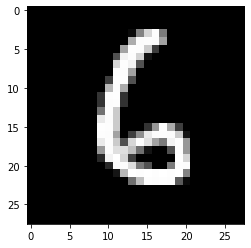

In [16]:
ind = np.random.choice(range(len(preds)))
print(preds[ind].item())
plt.imshow(x_valid[ind].reshape((28, 28)), cmap="gray")
plt.show()

### Save / load model

In [17]:
MODEL_PATH = Path("models")
MNIST_MODEL_PATH = MODEL_PATH / "mnist"

MNIST_MODEL_PATH.mkdir(parents=True, exist_ok=True)
FILENAME = (MNIST_MODEL_PATH / "mnist_model.pt")

In [18]:
# save model state
torch.save(model.state_dict(), FILENAME)

In [19]:
# model_saved = nn.Sequential(
#     nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
#     nn.ReLU(),
#     nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
#     nn.ReLU(),
#     nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
#     nn.ReLU(),
#     nn.AdaptiveAvgPool2d(1),
#     Lambda(lambda x: x.view(x.size(0), -1)),
# )
# model_saved.to(dev)

model_saved = Model_Mnist()
model_saved.to(dev)

model_saved.load_state_dict(torch.load(FILENAME))

<All keys matched successfully>

In [20]:
def count_correct(y_pred, y_truth):
    preds = torch.argmax(y_pred, dim=1)
    return (preds == y_truth).float().sum()

model_saved.eval()
cc = 0
tot = 0
with torch.no_grad():
    for xb, yb in valid_dl:
        y_pred = model_saved(xb)
        tot += len(y_pred)
        cc += count_correct(y_pred, yb)
accuracy = cc/tot
print(accuracy)

tensor(0.9630, device='cuda:0')
